# Supplementary Figure - Sweep Across Hyperparameters

June 26, 2022

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator,FixedFormatter
import matplotlib.pylab as pylab

# analysis
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.linear_model import LinearRegression
from scipy import interpolate # don't import stats
from scipy import linalg as LA
from scipy.ndimage.filters import uniform_filter1d

# miscellaneous
from tqdm import tqdm
from itertools import cycle
from copy import deepcopy
import pickle

import logging
import warnings
import dataclasses
from dataclasses import dataclass
from typing import Optional, List

import sys
sys.path.append("../..")

In [2]:
from rnn import RNNparams, RNN
from task import Task
from simulation import Simulation
from algorithms.bptt import BPTT
from algorithms.rflo import RFLO
from algorithms.reinforce import REINFORCE
from algorithms.track_vars import TrackVars

from utils.plotting import plot_trained_trajectories, paper_format
from utils.metric import cos_sim, return_norm_and_angle
from utils.functions import choose_aligned_matrix

from utils.metric import cos_sim, flow_field_data, flow_field_predicted, calculate_flow_field_correlation


In [3]:
folder = 'figs-2022-6-26/'

In [4]:
trial_duration = 20
n_in=4
frac_on = 0.2

x_tonic = 0.0*np.ones((trial_duration, n_in)) # shape 20 x 4 i.e. time x channel
x_pulse1 = x_tonic.copy()
x_pulse2 = x_tonic.copy()
x_pulse3 = x_tonic.copy()
x_pulse4 = x_tonic.copy()
x_pulse1[0:int(trial_duration*frac_on),0] = 1
x_pulse2[0:int(trial_duration*frac_on),1] = 1
x_pulse3[0:int(trial_duration*frac_on),2] = 1
x_pulse4[0:int(trial_duration*frac_on),3] = 1

task1 = Task(x_in=x_pulse1,y_target=np.asarray([[1],[1]]))
task2 = Task(x_in=x_pulse2,y_target=np.asarray([[-1],[1]]))
task3 = Task(x_in=x_pulse3,y_target=np.asarray([[1],[-1]]))
task4 = Task(x_in=x_pulse4,y_target=np.asarray([[-1],[-1]]))

4it [00:00, 37.62it/s]

n_in: 4
n_rec: 50
n_out: 2
sig_in: 0.0
sig_rec: (0.01,)
sig_out: 0.01
tau_rec: 10
dt: 1.0
eta_in: 0.1
eta_rec: 0.2
eta_out: 0.1
g_in: 2.0
g_rec: 1.5
g_out: 2.0
g_fb: 2.0
driving_feedback: False
eta_fb: None
sig_fb: None
feedback_signal: position
velocity_transform: False
tau_vel: 0.8
dt_vel: 0.1
sig_rec_dim: None
eta_m: None
sig_m: None
lam_m: None
rng: <mtrand.RandomState object at 0x7fa26a833dc8>


500it [00:09, 52.47it/s]
9it [00:00, 87.50it/s]


~~~~ OVERLAP w_out1 wout0 0.5, OVERLAP w_out1 w_m SEED 0.5


M norm: 1.11	 M angle: 0.50, 28 iterations
w_out1 norm: 1.44	 w_out vs. w_out1 angle: 0.50
w_m norm: 1.11	 w_out1 vs. w_m angle: 0.50
w_m norm: 1.69	 w_out vs. w_m angle: 0.19

500it [00:07, 66.01it/s]
5000it [02:17, 36.45it/s]
500it [00:14, 50.24it/s]


AR early fit 0.977, late fit 0.981


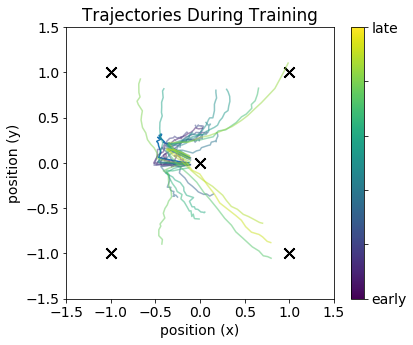

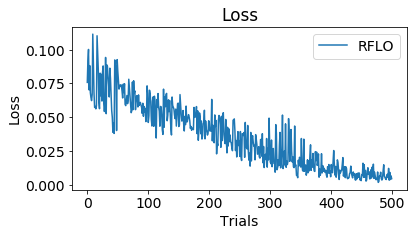

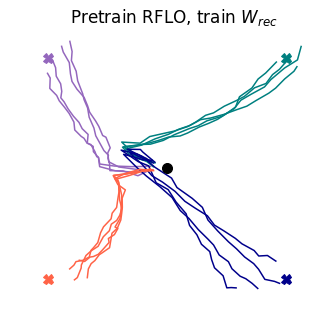

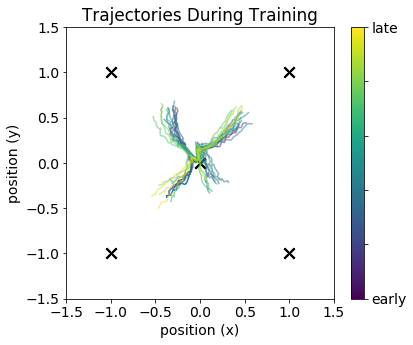

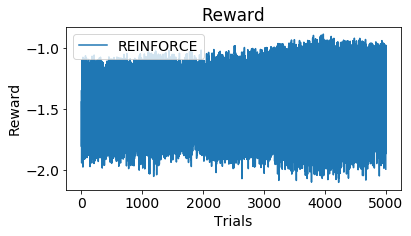

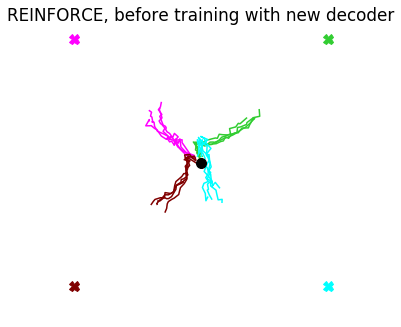

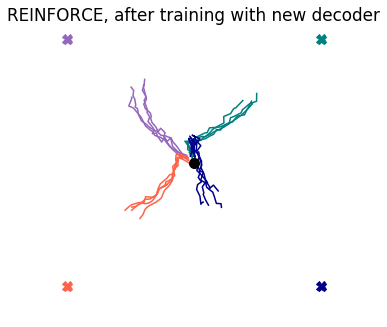

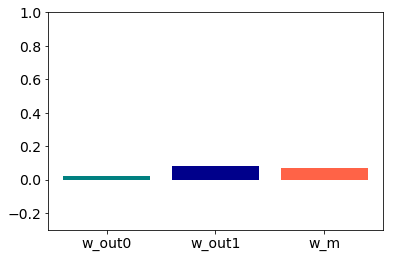

4it [00:00, 38.99it/s]

n_in: 4
n_rec: 50
n_out: 2
sig_in: 0.0
sig_rec: (0.1,)
sig_out: 0.01
tau_rec: 10
dt: 1.0
eta_in: 0.1
eta_rec: 0.2
eta_out: 0.1
g_in: 2.0
g_rec: 1.5
g_out: 2.0
g_fb: 2.0
driving_feedback: False
eta_fb: None
sig_fb: None
feedback_signal: position
velocity_transform: False
tau_vel: 0.8
dt_vel: 0.1
sig_rec_dim: None
eta_m: None
sig_m: None
lam_m: None
rng: <mtrand.RandomState object at 0x7fa254503318>


500it [00:10, 46.96it/s]
8it [00:00, 75.41it/s]


~~~~ OVERLAP w_out1 wout0 0.5, OVERLAP w_out1 w_m SEED 0.5


M norm: 1.11	 M angle: 0.50, 28 iterations
w_out1 norm: 1.44	 w_out vs. w_out1 angle: 0.50
w_m norm: 1.11	 w_out1 vs. w_m angle: 0.50
w_m norm: 1.69	 w_out vs. w_m angle: 0.19

500it [00:09, 53.28it/s]
5000it [02:22, 35.11it/s]
500it [00:10, 35.88it/s]


AR early fit 0.946, late fit 0.975


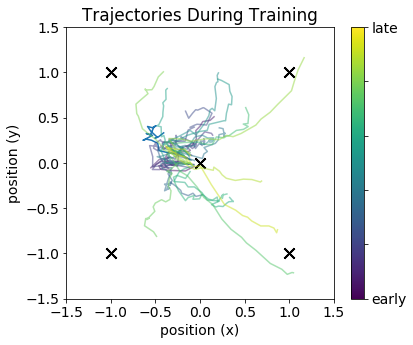

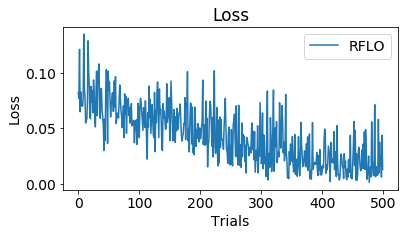

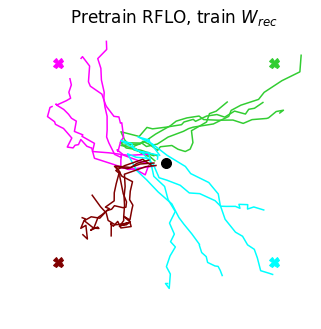

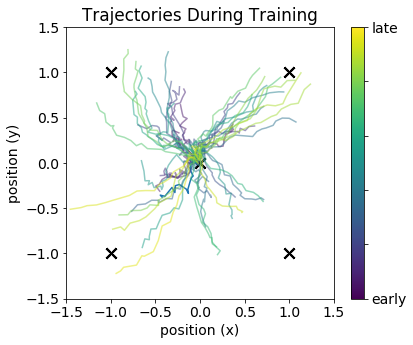

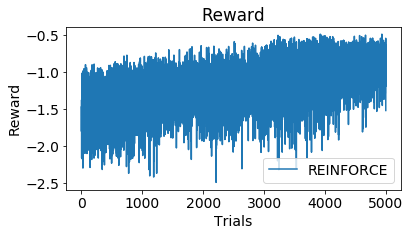

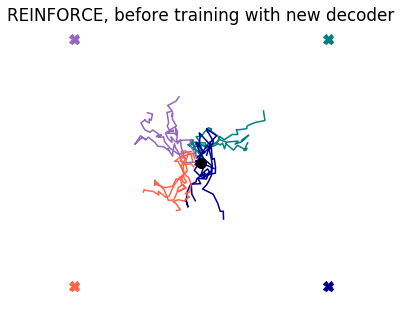

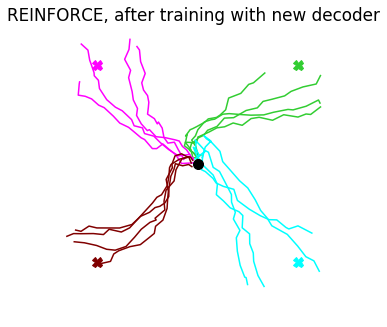

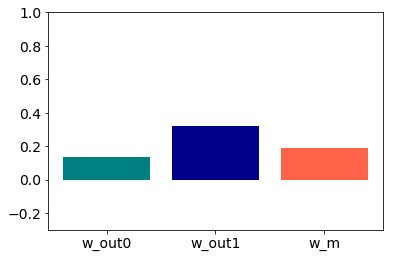

3it [00:00, 25.01it/s]

n_in: 4
n_rec: 50
n_out: 2
sig_in: 0.0
sig_rec: (0.25,)
sig_out: 0.01
tau_rec: 10
dt: 1.0
eta_in: 0.1
eta_rec: 0.2
eta_out: 0.1
g_in: 2.0
g_rec: 1.5
g_out: 2.0
g_fb: 2.0
driving_feedback: False
eta_fb: None
sig_fb: None
feedback_signal: position
velocity_transform: False
tau_vel: 0.8
dt_vel: 0.1
sig_rec_dim: None
eta_m: None
sig_m: None
lam_m: None
rng: <mtrand.RandomState object at 0x7fa2545031b0>


500it [00:15, 32.57it/s]
6it [00:00, 55.16it/s]


~~~~ OVERLAP w_out1 wout0 0.5, OVERLAP w_out1 w_m SEED 0.5


M norm: 1.11	 M angle: 0.50, 28 iterations
w_out1 norm: 1.44	 w_out vs. w_out1 angle: 0.50
w_m norm: 1.11	 w_out1 vs. w_m angle: 0.50
w_m norm: 1.69	 w_out vs. w_m angle: 0.19

500it [00:12, 41.47it/s]
5000it [01:19, 62.78it/s]
500it [00:05, 84.11it/s]


AR early fit 0.916, late fit 0.966


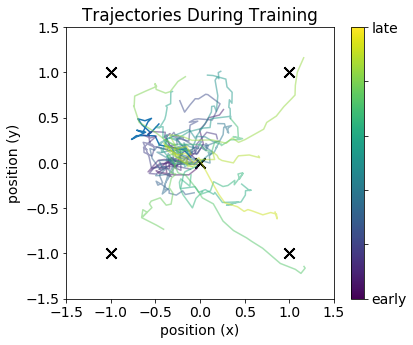

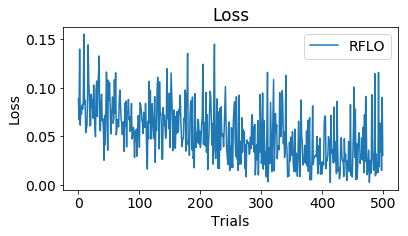

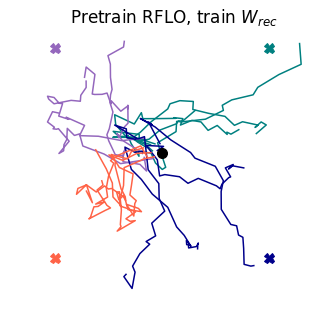

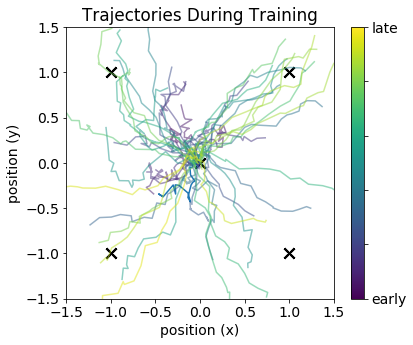

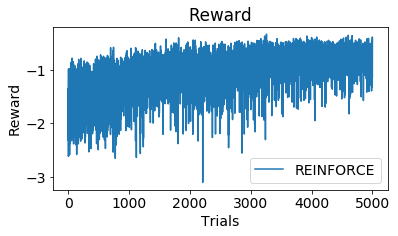

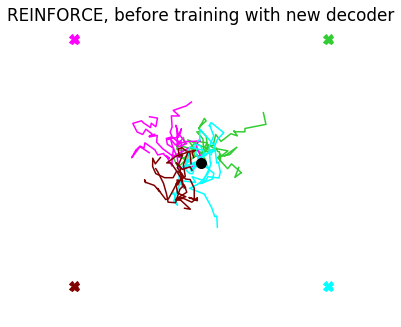

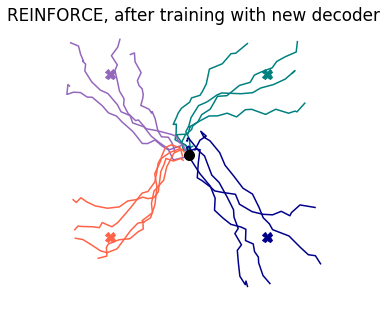

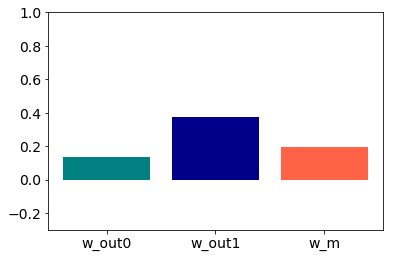

4it [00:00, 39.32it/s]

n_in: 4
n_rec: 50
n_out: 2
sig_in: 0.0
sig_rec: (0.5,)
sig_out: 0.01
tau_rec: 10
dt: 1.0
eta_in: 0.1
eta_rec: 0.2
eta_out: 0.1
g_in: 2.0
g_rec: 1.5
g_out: 2.0
g_fb: 2.0
driving_feedback: False
eta_fb: None
sig_fb: None
feedback_signal: position
velocity_transform: False
tau_vel: 0.8
dt_vel: 0.1
sig_rec_dim: None
eta_m: None
sig_m: None
lam_m: None
rng: <mtrand.RandomState object at 0x7fa256353900>


500it [00:06, 72.42it/s]
10it [00:00, 93.29it/s]


~~~~ OVERLAP w_out1 wout0 0.5, OVERLAP w_out1 w_m SEED 0.5


M norm: 1.11	 M angle: 0.50, 28 iterations
w_out1 norm: 1.44	 w_out vs. w_out1 angle: 0.50
w_m norm: 1.11	 w_out1 vs. w_m angle: 0.50
w_m norm: 1.69	 w_out vs. w_m angle: 0.19

500it [00:05, 90.46it/s]
5000it [01:06, 75.18it/s]
500it [00:05, 84.41it/s]


AR early fit 0.889, late fit 0.959


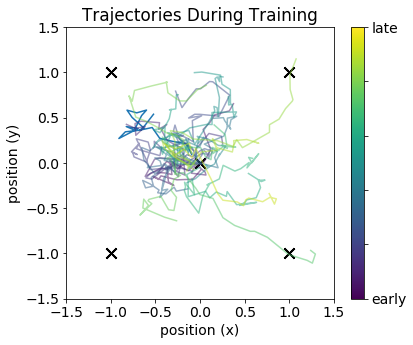

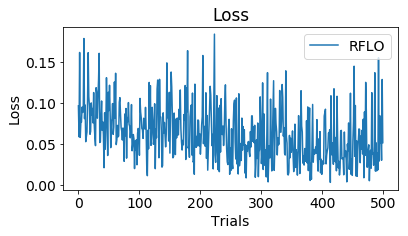

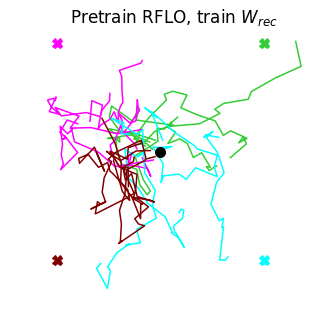

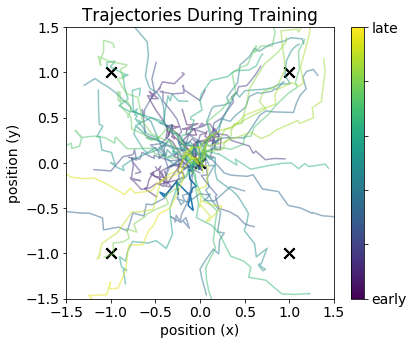

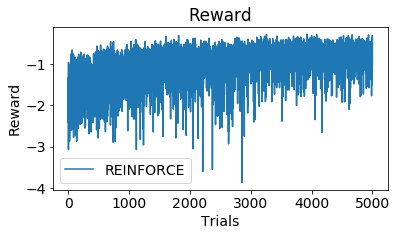

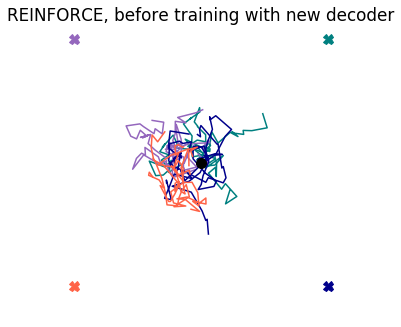

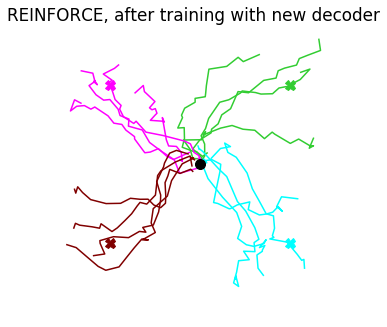

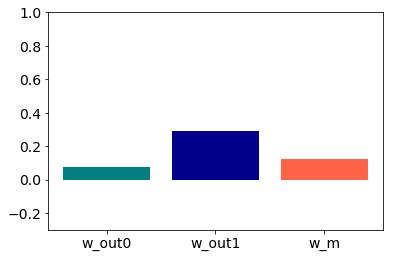

6it [00:00, 52.17it/s]

n_in: 4
n_rec: 50
n_out: 2
sig_in: 0.0
sig_rec: (0.01,)
sig_out: 0.01
tau_rec: 10
dt: 1.0
eta_in: 0.1
eta_rec: 0.2
eta_out: 0.1
g_in: 2.0
g_rec: 1.5
g_out: 2.0
g_fb: 2.0
driving_feedback: False
eta_fb: None
sig_fb: None
feedback_signal: position
velocity_transform: False
tau_vel: 0.8
dt_vel: 0.1
sig_rec_dim: None
eta_m: None
sig_m: None
lam_m: None
rng: <mtrand.RandomState object at 0x7fa2563b6678>


500it [00:06, 71.87it/s]
9it [00:00, 82.32it/s]


~~~~ OVERLAP w_out1 wout0 0.5, OVERLAP w_out1 w_m SEED 0.5


M norm: 1.08	 M angle: 0.50, 3 iterations
w_out1 norm: 1.42	 w_out vs. w_out1 angle: 0.50
w_m norm: 1.08	 w_out1 vs. w_m angle: 0.50
w_m norm: 1.64	 w_out vs. w_m angle: 0.24

500it [00:05, 84.03it/s]
5000it [01:07, 74.36it/s]
500it [00:06, 85.66it/s]


AR early fit 0.977, late fit 0.981


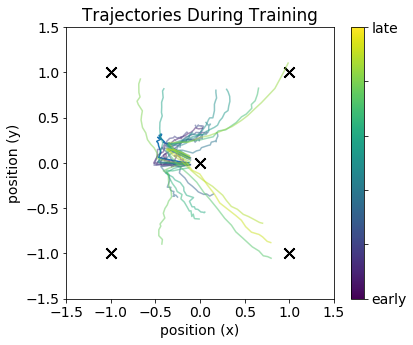

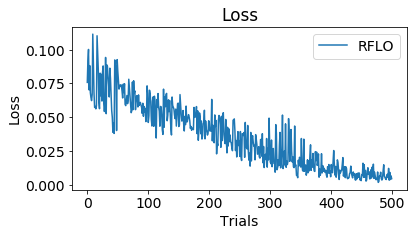

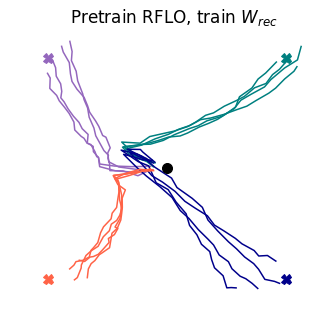

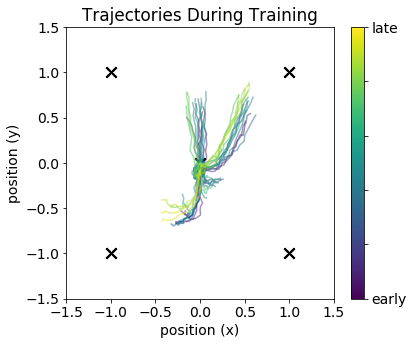

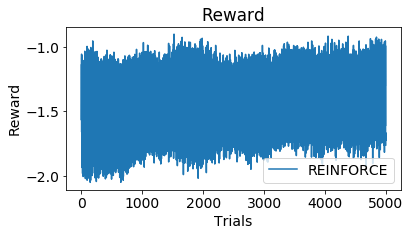

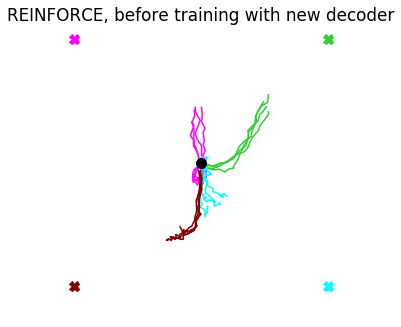

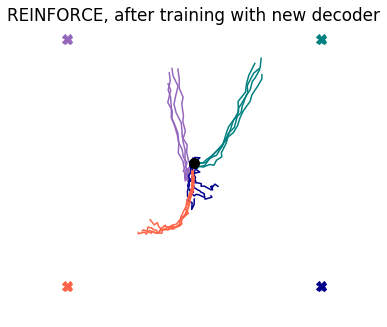

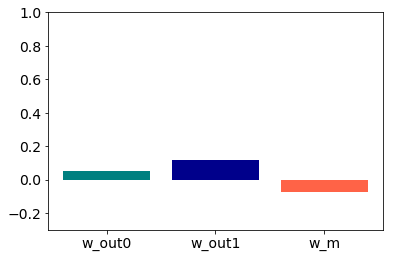

7it [00:00, 62.67it/s]

n_in: 4
n_rec: 50
n_out: 2
sig_in: 0.0
sig_rec: (0.1,)
sig_out: 0.01
tau_rec: 10
dt: 1.0
eta_in: 0.1
eta_rec: 0.2
eta_out: 0.1
g_in: 2.0
g_rec: 1.5
g_out: 2.0
g_fb: 2.0
driving_feedback: False
eta_fb: None
sig_fb: None
feedback_signal: position
velocity_transform: False
tau_vel: 0.8
dt_vel: 0.1
sig_rec_dim: None
eta_m: None
sig_m: None
lam_m: None
rng: <mtrand.RandomState object at 0x7fa2550b3090>


500it [00:06, 71.73it/s]
9it [00:00, 89.01it/s]


~~~~ OVERLAP w_out1 wout0 0.5, OVERLAP w_out1 w_m SEED 0.5


M norm: 1.08	 M angle: 0.50, 3 iterations
w_out1 norm: 1.42	 w_out vs. w_out1 angle: 0.50
w_m norm: 1.08	 w_out1 vs. w_m angle: 0.50
w_m norm: 1.64	 w_out vs. w_m angle: 0.24

500it [00:05, 86.53it/s]
5000it [01:16, 65.77it/s]
500it [00:10, 48.39it/s]


AR early fit 0.946, late fit 0.974


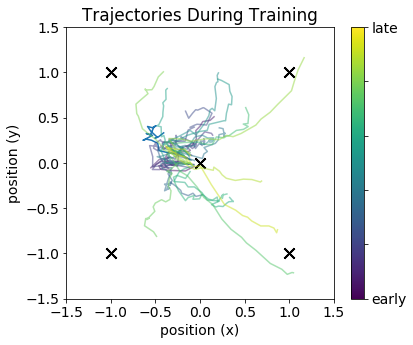

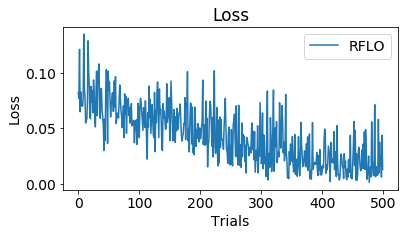

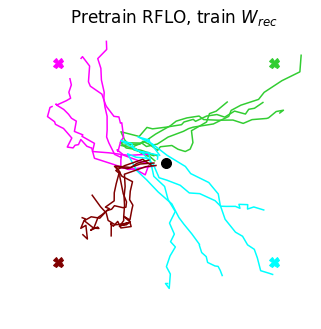

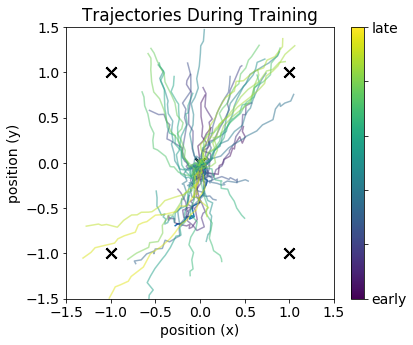

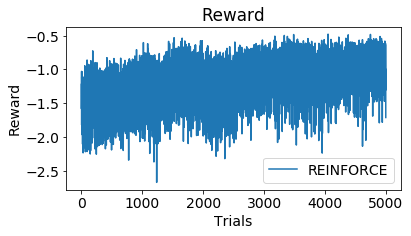

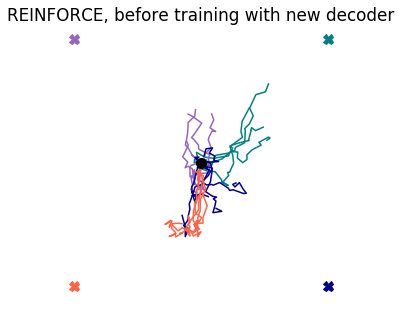

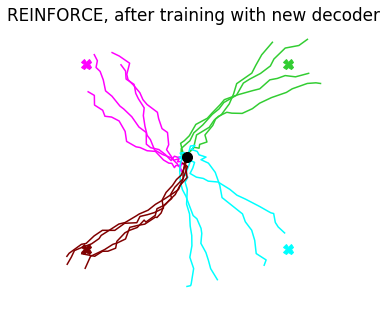

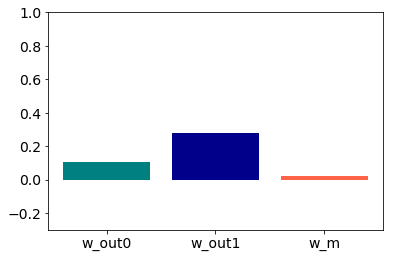

3it [00:00, 29.47it/s]

n_in: 4
n_rec: 50
n_out: 2
sig_in: 0.0
sig_rec: (0.25,)
sig_out: 0.01
tau_rec: 10
dt: 1.0
eta_in: 0.1
eta_rec: 0.2
eta_out: 0.1
g_in: 2.0
g_rec: 1.5
g_out: 2.0
g_fb: 2.0
driving_feedback: False
eta_fb: None
sig_fb: None
feedback_signal: position
velocity_transform: False
tau_vel: 0.8
dt_vel: 0.1
sig_rec_dim: None
eta_m: None
sig_m: None
lam_m: None
rng: <mtrand.RandomState object at 0x7fa26a92e288>


500it [00:12, 42.63it/s]
6it [00:00, 55.45it/s]


~~~~ OVERLAP w_out1 wout0 0.5, OVERLAP w_out1 w_m SEED 0.5


M norm: 1.08	 M angle: 0.50, 3 iterations
w_out1 norm: 1.42	 w_out vs. w_out1 angle: 0.50
w_m norm: 1.08	 w_out1 vs. w_m angle: 0.50
w_m norm: 1.64	 w_out vs. w_m angle: 0.24

500it [00:10, 54.88it/s]
5000it [01:40, 49.79it/s]
500it [00:06, 78.76it/s]


AR early fit 0.916, late fit 0.966


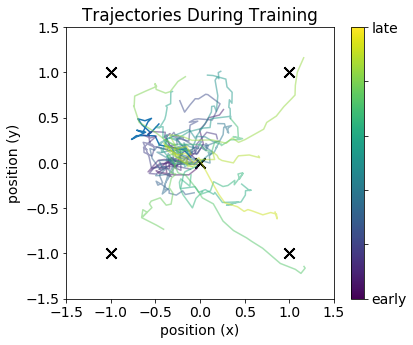

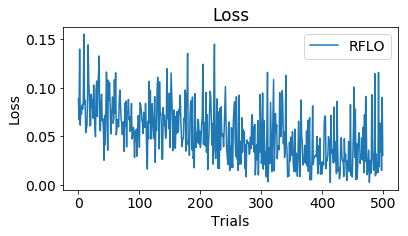

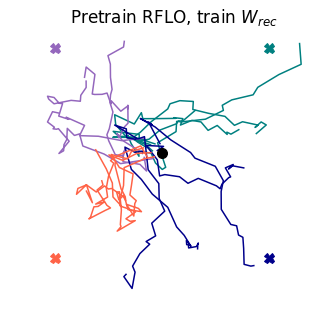

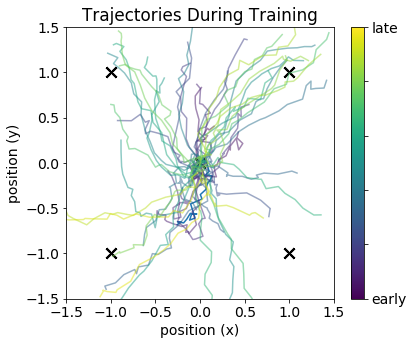

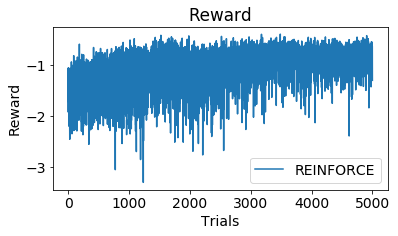

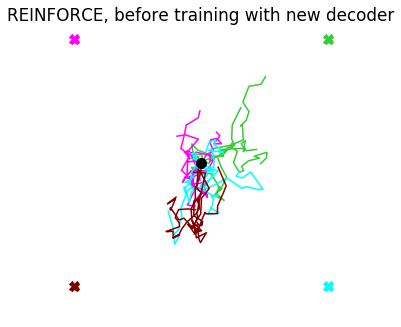

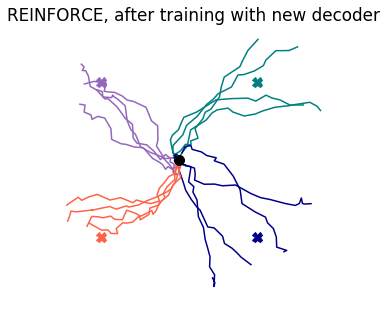

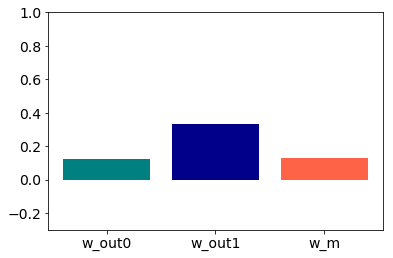

6it [00:00, 53.97it/s]

n_in: 4
n_rec: 50
n_out: 2
sig_in: 0.0
sig_rec: (0.5,)
sig_out: 0.01
tau_rec: 10
dt: 1.0
eta_in: 0.1
eta_rec: 0.2
eta_out: 0.1
g_in: 2.0
g_rec: 1.5
g_out: 2.0
g_fb: 2.0
driving_feedback: False
eta_fb: None
sig_fb: None
feedback_signal: position
velocity_transform: False
tau_vel: 0.8
dt_vel: 0.1
sig_rec_dim: None
eta_m: None
sig_m: None
lam_m: None
rng: <mtrand.RandomState object at 0x7fa2562a2480>


500it [00:07, 66.52it/s]
7it [00:00, 62.83it/s]


~~~~ OVERLAP w_out1 wout0 0.5, OVERLAP w_out1 w_m SEED 0.5


M norm: 1.08	 M angle: 0.50, 3 iterations
w_out1 norm: 1.42	 w_out vs. w_out1 angle: 0.50
w_m norm: 1.08	 w_out1 vs. w_m angle: 0.50
w_m norm: 1.64	 w_out vs. w_m angle: 0.24

500it [00:05, 85.81it/s]
5000it [01:07, 73.56it/s]
500it [00:05, 84.61it/s]


AR early fit 0.889, late fit 0.959


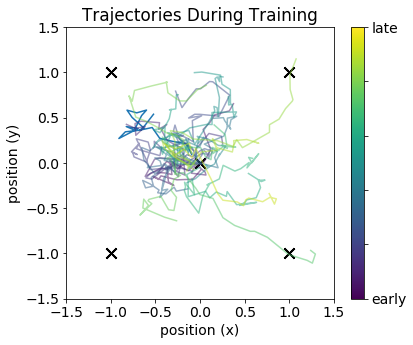

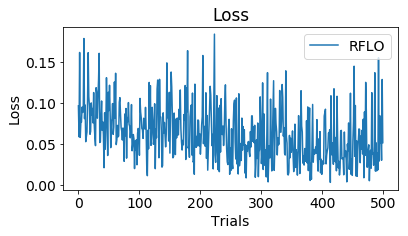

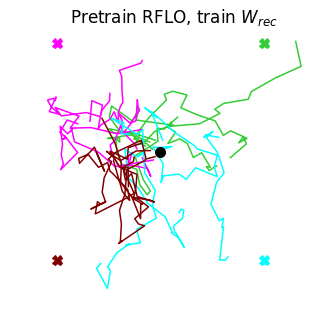

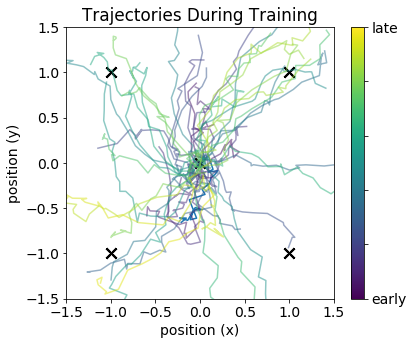

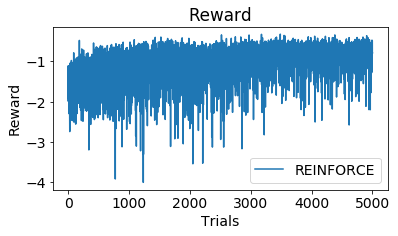

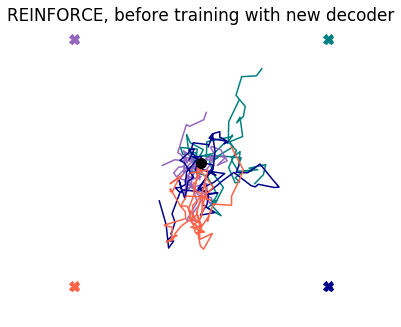

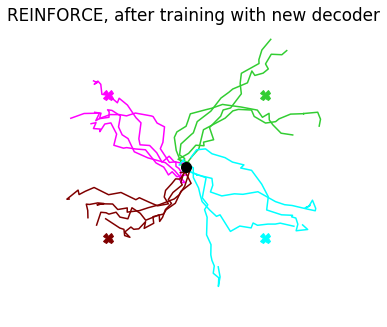

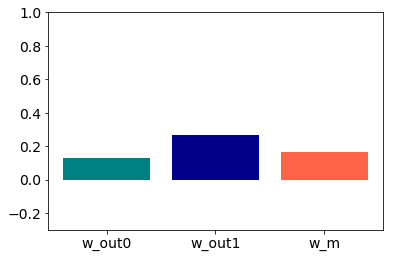

4it [00:00, 39.41it/s]

n_in: 4
n_rec: 50
n_out: 2
sig_in: 0.0
sig_rec: (0.01,)
sig_out: 0.01
tau_rec: 10
dt: 1.0
eta_in: 0.1
eta_rec: 0.2
eta_out: 0.1
g_in: 2.0
g_rec: 1.5
g_out: 2.0
g_fb: 2.0
driving_feedback: False
eta_fb: None
sig_fb: None
feedback_signal: position
velocity_transform: False
tau_vel: 0.8
dt_vel: 0.1
sig_rec_dim: None
eta_m: None
sig_m: None
lam_m: None
rng: <mtrand.RandomState object at 0x7fa26a9e2048>


500it [00:07, 68.62it/s]
9it [00:00, 86.73it/s]


~~~~ OVERLAP w_out1 wout0 0.5, OVERLAP w_out1 w_m SEED 0.5


M norm: 1.13	 M angle: 0.50, 8 iterations
w_out1 norm: 1.45	 w_out vs. w_out1 angle: 0.49
w_m norm: 1.13	 w_out1 vs. w_m angle: 0.50
w_m norm: 1.79	 w_out vs. w_m angle: 0.11

500it [00:05, 84.80it/s]
5000it [01:10, 70.71it/s]
500it [00:05, 84.45it/s]


AR early fit 0.977, late fit 0.981


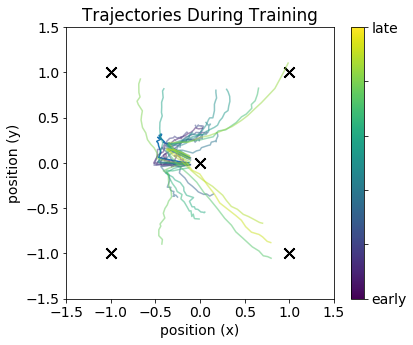

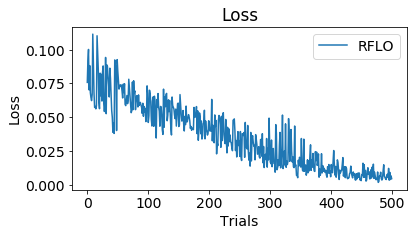

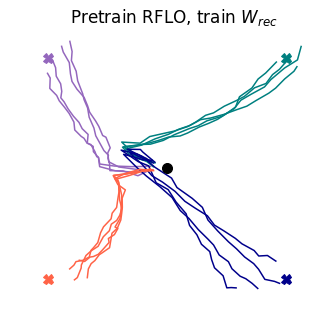

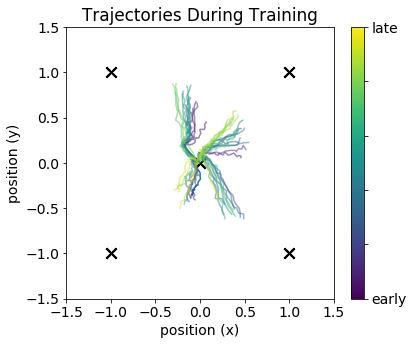

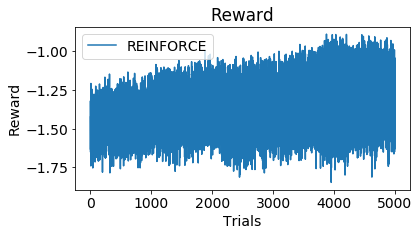

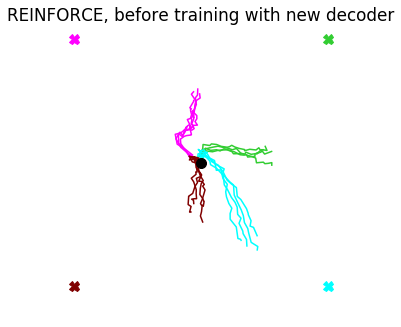

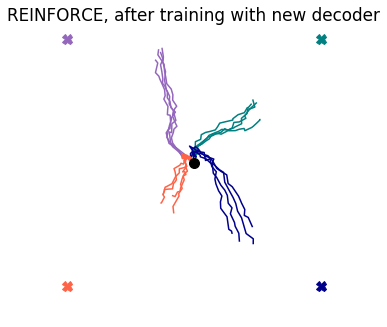

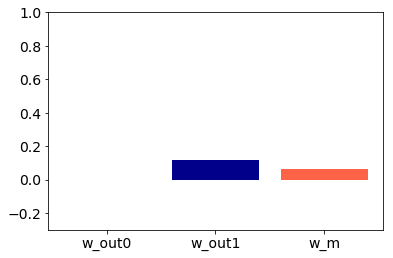

5it [00:00, 46.47it/s]

n_in: 4
n_rec: 50
n_out: 2
sig_in: 0.0
sig_rec: (0.1,)
sig_out: 0.01
tau_rec: 10
dt: 1.0
eta_in: 0.1
eta_rec: 0.2
eta_out: 0.1
g_in: 2.0
g_rec: 1.5
g_out: 2.0
g_fb: 2.0
driving_feedback: False
eta_fb: None
sig_fb: None
feedback_signal: position
velocity_transform: False
tau_vel: 0.8
dt_vel: 0.1
sig_rec_dim: None
eta_m: None
sig_m: None
lam_m: None
rng: <mtrand.RandomState object at 0x7fa26aada750>


500it [00:07, 69.54it/s]
6it [00:00, 57.31it/s]


~~~~ OVERLAP w_out1 wout0 0.5, OVERLAP w_out1 w_m SEED 0.5


M norm: 1.13	 M angle: 0.50, 8 iterations
w_out1 norm: 1.45	 w_out vs. w_out1 angle: 0.49
w_m norm: 1.13	 w_out1 vs. w_m angle: 0.50
w_m norm: 1.79	 w_out vs. w_m angle: 0.11

500it [00:05, 84.30it/s]
5000it [01:10, 71.01it/s]
500it [00:05, 85.39it/s]


AR early fit 0.946, late fit 0.975


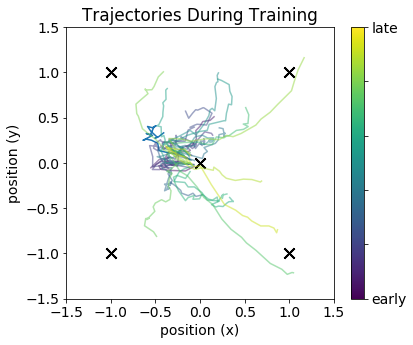

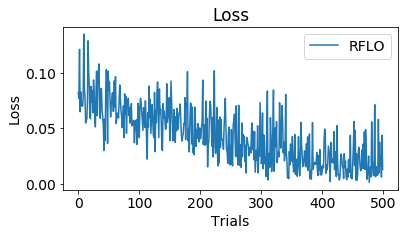

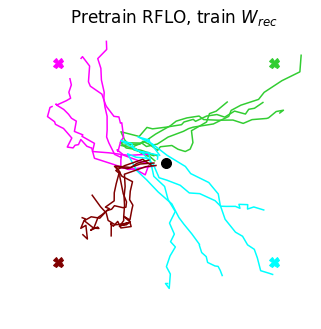

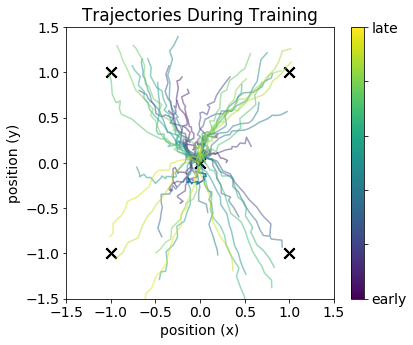

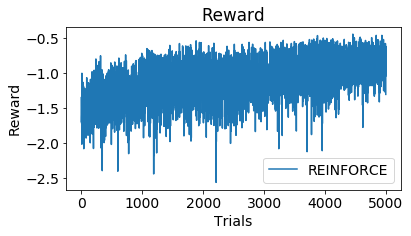

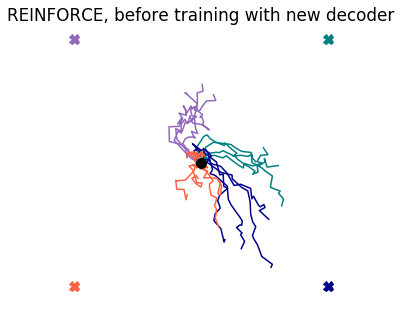

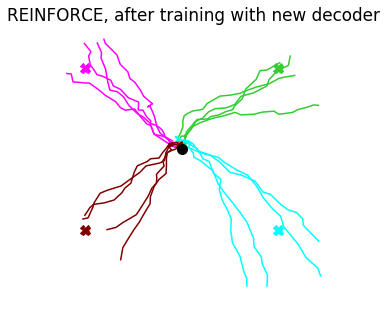

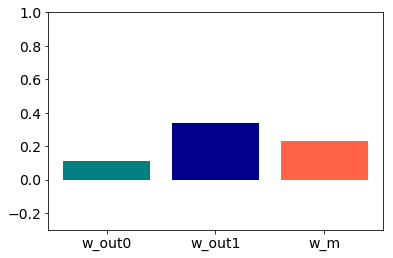

5it [00:00, 45.20it/s]

n_in: 4
n_rec: 50
n_out: 2
sig_in: 0.0
sig_rec: (0.25,)
sig_out: 0.01
tau_rec: 10
dt: 1.0
eta_in: 0.1
eta_rec: 0.2
eta_out: 0.1
g_in: 2.0
g_rec: 1.5
g_out: 2.0
g_fb: 2.0
driving_feedback: False
eta_fb: None
sig_fb: None
feedback_signal: position
velocity_transform: False
tau_vel: 0.8
dt_vel: 0.1
sig_rec_dim: None
eta_m: None
sig_m: None
lam_m: None
rng: <mtrand.RandomState object at 0x7fa26aadadc8>


500it [00:08, 62.00it/s]
8it [00:00, 73.06it/s]


~~~~ OVERLAP w_out1 wout0 0.5, OVERLAP w_out1 w_m SEED 0.5


M norm: 1.13	 M angle: 0.50, 8 iterations
w_out1 norm: 1.45	 w_out vs. w_out1 angle: 0.49
w_m norm: 1.13	 w_out1 vs. w_m angle: 0.50
w_m norm: 1.79	 w_out vs. w_m angle: 0.11

500it [00:06, 78.03it/s]
5000it [01:08, 72.72it/s]
500it [00:05, 83.76it/s]


AR early fit 0.916, late fit 0.966


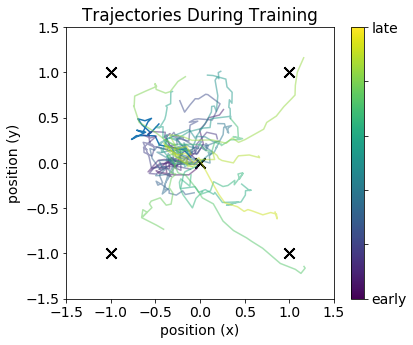

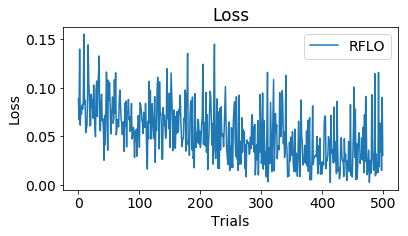

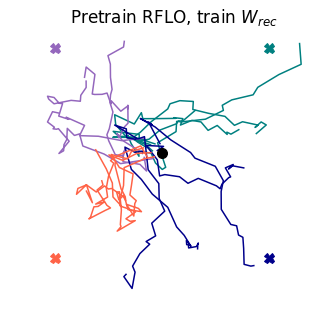

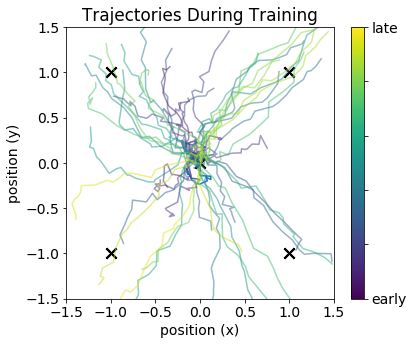

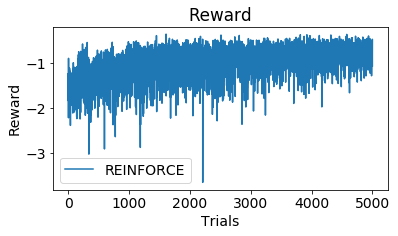

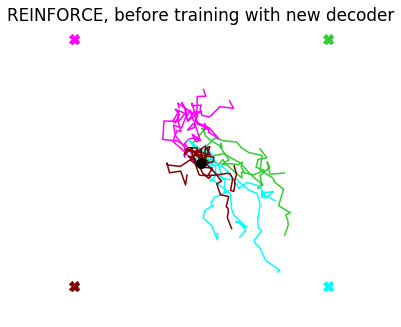

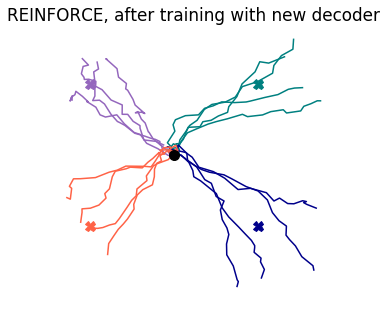

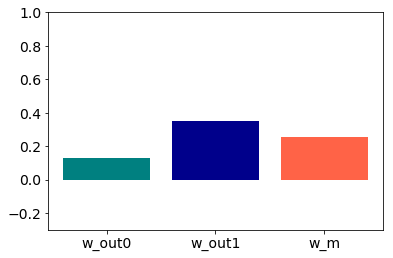

5it [00:00, 44.56it/s]

n_in: 4
n_rec: 50
n_out: 2
sig_in: 0.0
sig_rec: (0.5,)
sig_out: 0.01
tau_rec: 10
dt: 1.0
eta_in: 0.1
eta_rec: 0.2
eta_out: 0.1
g_in: 2.0
g_rec: 1.5
g_out: 2.0
g_fb: 2.0
driving_feedback: False
eta_fb: None
sig_fb: None
feedback_signal: position
velocity_transform: False
tau_vel: 0.8
dt_vel: 0.1
sig_rec_dim: None
eta_m: None
sig_m: None
lam_m: None
rng: <mtrand.RandomState object at 0x7fa26c061288>


500it [00:07, 67.80it/s]
18it [00:00, 86.74it/s]


~~~~ OVERLAP w_out1 wout0 0.5, OVERLAP w_out1 w_m SEED 0.5


M norm: 1.13	 M angle: 0.50, 8 iterations
w_out1 norm: 1.45	 w_out vs. w_out1 angle: 0.49
w_m norm: 1.13	 w_out1 vs. w_m angle: 0.50
w_m norm: 1.79	 w_out vs. w_m angle: 0.11

500it [00:05, 86.74it/s]
5000it [01:08, 72.57it/s]
500it [00:06, 80.51it/s]


AR early fit 0.889, late fit 0.960


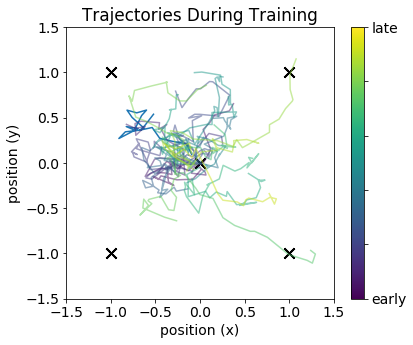

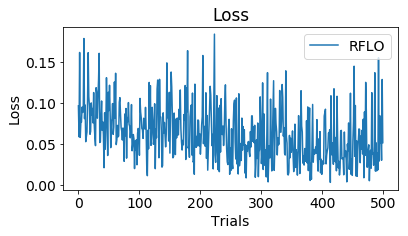

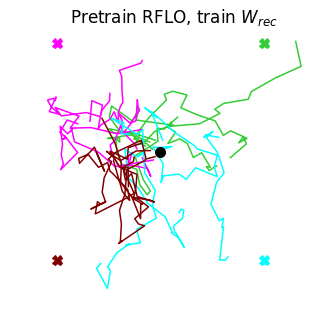

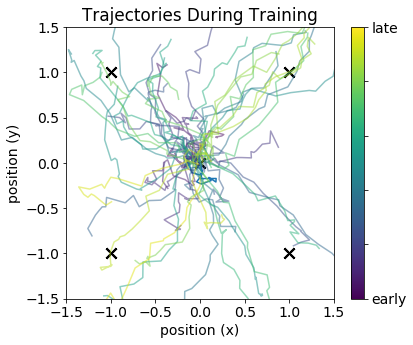

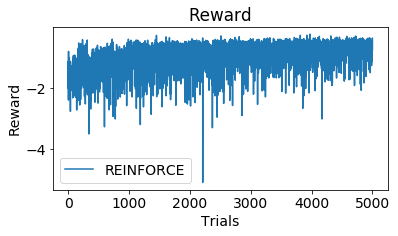

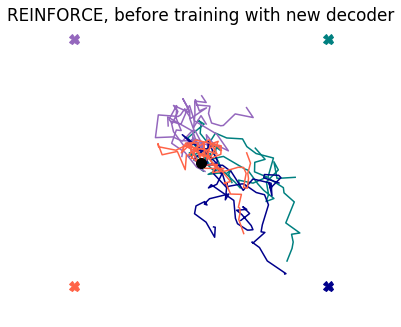

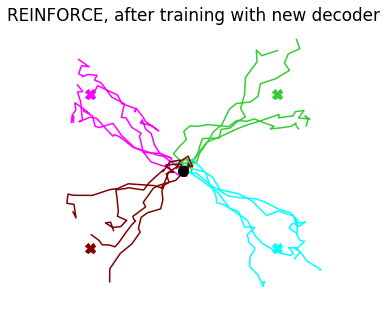

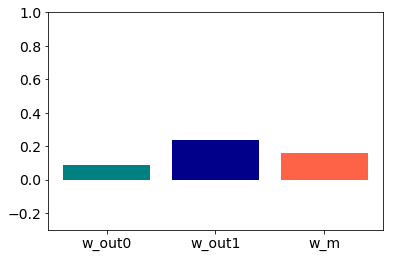

In [5]:
rnn_seed = 1889 #72

""" Average over multiple seeds """

# seeds = [0,22,33,47] #,54,72,81]
# overlaps = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
# n_changes = [75,75,60,50,50,50,30,30,1]
#overlaps = [0.4,0.5,0.6,0.7,0.8,0.9]
#n_changes = [60,50,50,40,30,5]

seeds=[568,1918,543] #22,1918,543,98] #[55,72,]


""" vary overlap between w_out and w_m_sigma that generates covariance matrix """
# overlaps = [0.4,0.6,0.8]
# n_changes = [60,50,30]

# overlap = 0.6
# n_change = 50

overlap_w_out0 = 0.5
n_change_w_out0 = 50 


pretrain_duration = 500#00 #00
train_duration=5000 #00 #5000

overlap_w_m = 0.5 # We want W_m to be the same as wbmi1 here, so learning can occur with REINFORCE
n_change_w_m = 50

dim=50

sig_recs=[0.01,0.1,0.25,0.5]



stats = {}
stats['corr1'] = []
stats['corr2'] = []
stats['corr3'] = []
stats['corrcoef'] = []


stats['seeds'] = seeds
#stats['overlap'] = overlap
stats['overlap_w_m'] = overlap_w_m


for seed in seeds:

    corr1_list = []
    corr2_list = []
    corr3_list = []
    corrcoef_list = []
    

    #for overlap,n_change in zip(overlaps,n_changes):
    #for dim in dimensions:
    for sig_rec in zip(sig_recs):
        
        # Set RNN Parameters
        params = RNNparams(n_in=4,n_rec=50,n_out=2,tau_rec=10,
                       eta_in=0.1,eta_rec=0.2,eta_out=0.1,
                       sig_in=0.0,sig_rec=sig_rec,sig_out=0.01,
                       velocity_transform=False, tau_vel = 0.8, dt_vel = 0.1,
                       rng=np.random.RandomState(rnn_seed))
        params.print_params()

        
        
        # Initialize RNN, train with RFLO
        net0 = RNN(params)
        sim0 = Simulation(net0)
        rflo = RFLO(net0,apply_to=['w_rec'],online=False)
        sim0.run_session(n_trials=pretrain_duration, tasks=[task1,task2,task3,task4], learn_alg=[rflo], probe_types=['loss'], plot=True, plot_freq=20)

        fig0 = plot_trained_trajectories(sim=sim0, tasks=[task1,task2,task3,task4],title='Pretrain RFLO, train '+r'$W_{rec}$')


        
        
        
        print('\n~~~~ OVERLAP w_out1 wout0 {}, OVERLAP w_out1 w_m SEED {}'.format(overlap_w_out0,overlap_w_m,seed))
        print('\n')
        
        """ choose new decoder w_out1, change overlap """
        w_out1 = choose_aligned_matrix(net0.w_out.copy(),n_change=n_change_w_out0,overlap=overlap_w_out0,rng=np.random.RandomState(seed),zero=False,tolerance=0.01,loop=500000)
        #""" choose new internal model w_m, keep constant """
        w_m = choose_aligned_matrix(w_out1.copy(),n_change=n_change_w_m,overlap=overlap_w_m,rng=np.random.RandomState(seed),zero=False,tolerance=0.01,loop=500000)

        
        # confirm overlap between w_out1 and w_out
        norm, angle = return_norm_and_angle(net0.w_out,w_out1)
        print('\nw_out1 norm: {:.2f}'.format(norm) + '\t w_out vs. w_out1 angle: {:.2f}'.format(angle),end='')

        # confirm overlap between w_out1 and w_m
        norm, angle = return_norm_and_angle(w_out1,w_m)
        print('\nw_m norm: {:.2f}'.format(norm) + '\t w_out1 vs. w_m angle: {:.2f}'.format(angle),end='')

        # confirm overlap between w_out and w_m
        norm, angle = return_norm_and_angle(net0.w_out,w_m)
        print('\nw_m norm: {:.2f}'.format(norm) + '\t w_out vs. w_m angle: {:.2f}'.format(angle),end='')
        

        
        
        net2_pre = RNN(params)
        net2_pre.set_weights(w_in=net0.w_in.copy(), w_rec=net0.w_rec.copy())
        net2_pre.set_weights(w_out = w_out1)
        net2_pre.set_weights(w_m = 0*w_m.T) # shouldn't matter for REINFORCE

        # unfortunately I need to make a different network to maintain integrity of pre and post simulations for plotting
        net2 = RNN(params)
        net2.set_weights(w_in=net0.w_in.copy(), w_rec=net0.w_rec.copy())
        net2.set_weights(w_out = w_out1)
        net2.set_weights(w_m = 0*w_m.T) # shouldn't matter for REINFORCE



        """ Track activity with new decoder, before training """

        sim2_pre = Simulation(net2_pre)
        trackvars = TrackVars(net2_pre,apply_to=[]) 
        sim2_pre.run_session(n_trials=500, tasks=[task1,task2,task3,task4], learn_alg=[trackvars], probe_types=['h','err'], plot=False, plot_freq=10)
        #fig = plot_trained_trajectories(sim=sim1_pre, tasks=[task1,task2,task3,task4],title='RFLO, before training with new decoder')

        """ Train with new decoder """

        sim2_train = Simulation(net2)
        reinforce = REINFORCE(net2,apply_to=['w_rec'],online=False,tau_reward=5)
        sim2_train.run_session(n_trials=train_duration, tasks=[task1,task2,task3,task4], learn_alg=[reinforce], probe_types=['h','reward','err'], plot=True, plot_freq=100)

        """ Track activity with new decoder, after training """
        net2_post = RNN(params)
        net2_post.set_weights(w_in=net2.w_in.copy(), w_rec=net2.w_rec.copy())
        net2_post.set_weights(w_out = net2.w_out)
        net2_post.set_weights(w_m = 0*net2.w_m) # shouldn't matter for REINFORCE

        sim2_post = Simulation(net2_post)
        trackvars = TrackVars(net2_post,apply_to=[]) 
        sim2_post.run_session(n_trials=500, tasks=[task1,task2,task3,task4], learn_alg=[trackvars], probe_types=['h','err'], plot=False, plot_freq=10)

        
        fig = plot_trained_trajectories(sim=sim2_pre, tasks=[task1,task2,task3,task4],title='REINFORCE, before training with new decoder')

        fig = plot_trained_trajectories(sim=sim2_post, tasks=[task1,task2,task3,task4],title='REINFORCE, after training with new decoder')
        
        
        """ Calculate F fields """
        F_early, score_early = flow_field_data(sim2_pre.session_probes['h'])
        F_late, score_late = flow_field_data(sim2_post.session_probes['h'])

        print('AR early fit {:.3f}, late fit {:.3f}'.format(score_early,score_late))

        Fdata = F_late - F_early

        # separate train and test data from sim1_train
        n_total = len(sim2_train.session_probes['h'])
        n_train = int(0.5 * n_total)
        idx_train = np.random.RandomState(1975+seed).choice(np.arange(0,n_total),size=n_train,replace=False).astype(int)
        idx_test = np.arange(0,n_total)[~idx_train].astype(int)
        #idx_test=idx_train

        h_train = np.asarray(sim2_train.session_probes['h'])[idx_train,:,:,:]
        err_train = np.asarray(sim2_train.session_probes['err'])[idx_train,:,:,:]

        Fpred_w_out = flow_field_predicted(net0.w_out,err_train,h_train)
        Fpred_w_out1 = flow_field_predicted(w_out1,err_train,h_train)
        Fpred_w_m = flow_field_predicted(w_m,err_train,h_train) # note w_m_sigma here

        h_test = np.asarray(sim2_train.session_probes['h'])[idx_test,:,:,:]

        corr1 = calculate_flow_field_correlation(Fpred_w_out,Fdata,h_test) # could also sample sim_test
        corr1_list.append(corr1)

        corr2 = calculate_flow_field_correlation(Fpred_w_out1,Fdata,h_test) # could also sample sim_test
        corr2_list.append(corr2)

        corr3 = calculate_flow_field_correlation(Fpred_w_m,Fdata,h_test) # could also sample sim_test
        corr3_list.append(corr3)
        
        
        fig,ax = plt.subplots(1,1)
        plt.bar([0,1,2],[corr1,corr2,corr3],tick_label=['w_out0','w_out1','w_m'],color=['teal','darkblue','tomato'])
        plt.ylim([-0.3,1])
        plt.show()
        
        
        
        
        
        
    # update
    stats['corr1'].append(corr1_list)
    stats['corr2'].append(corr2_list)
    stats['corr3'].append(corr3_list)
    #stats['corrcoef'].append(corrcoef_list)
    


In [6]:
""" save stats """
stats_reinforce_sig_rec = stats

save = True
tag = '6-26'

if save:
    
    with open(folder+'stats_reinforce_sig_rec-'+tag+'.pickle', 'wb') as handle:
        pickle.dump(stats_reinforce_sig_rec, handle, protocol=pickle.HIGHEST_PROTOCOL)

        print('>>>save stats_reinforce_sig_rec')

>>>save stats_reinforce_sig_rec


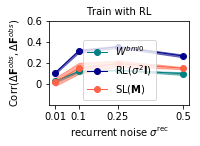

In [10]:
""" Same plot using flow field """
paper = True
save = True

tag = '-6-26'


fig,ax = plt.subplots(1,1,figsize=(6,4))

n_samples = len(stats['corr1'])
mn1 = np.mean(np.asarray(stats['corr1']),axis=0)
std1 = np.std(np.asarray(stats['corr1']),axis=0)
sem1 = std1/np.sqrt(n_samples)

mn2 = np.mean(np.asarray(stats['corr2']),axis=0)
std2 = np.std(np.asarray(stats['corr2']),axis=0)
sem2 = std2/np.sqrt(n_samples)

mn3 = np.mean(np.asarray(stats['corr3']),axis=0)
std3 = np.std(np.asarray(stats['corr3']),axis=0)
sem3 = std3/np.sqrt(n_samples)



plt.plot(sig_recs,mn1,'o-',linewidth=1,label=r'$W^{bmi0}$',color='teal')
plt.fill_between(sig_recs,mn1-sem1,mn1+sem1,alpha=0.5,color='teal')


plt.plot(sig_recs,mn2,'o-',linewidth=1,label='RL('+r'$\sigma^2 \mathbf{I})$',color='darkblue')
plt.fill_between(sig_recs,mn2-sem2,mn2+sem2,alpha=0.5,color='darkblue')

plt.plot(sig_recs,mn3,'o-',linewidth=1,label='SL('+r'$\mathbf{M})$',color='tomato')
plt.fill_between(sig_recs,mn3-sem3,mn3+sem3,alpha=0.5,color='tomato')


#plt.axhline(y=overlap_w_m,linestyle='--',label='overlap w_m w_out1')
plt.ylim([-0.2,.4])
plt.legend()
plt.title('Train with RL')
#plt.xlabel('alignment '+r'$M \angle W^{bmi1}$')
plt.xlabel('recurrent noise '+r'$\sigma^{\mathrm{rec}}$')
plt.ylabel('Corr'+r'$(\Delta \mathbf{F}^{obs}, \Delta \mathbf{F}^{obs})$')

plt.tight_layout()

if paper:
    fig,ax = paper_format(fig=fig,ax=ax,xlabels=sig_recs,ylabels=[0,0.2,0.4,0.6],ticksize=10,linewidth=2,ylim=[-.2,0.6],figsize=(2.25,3),labelsize=10)

plt.show()

if save:
    if paper:
        fig.savefig(folder+'reinforce-dF-sig_rec'+tag+'.pdf')
    else:
        fig.savefig(folder+'reinforce-dF-sig_rec'+tag+'.pdf')
        
        #RUN AGAIN WITH 0.5
